<h1>Capstone Project Data Science</h1>

<h2>The Battle of Neighborhoods</h2>

<h3>New Italian Restaurant in San Francisco, United States of America</h3>

<h4>Business problem</h4>


San Francisco is the city of my dreams and I think it might be a good thing to open an Italian restaurant in that city.  

Hence the idea of this project. I would like to determine the best possible location to open an Italian restaurant based on the different localities of the city, already established Italian restaurant in varios geographical location and ease of accessibility by maximum number of people so that the revenue from the latest venture can be maximized.

So I thought well to use an ML algorithm and Foursquare data to understand in which neighborhood to open the restaurant based on what people have done before him. 


<h4> Data </h4>

This project will use data from :
- http://www.healthysf.org/bdi/outcomes/zipmap.htm - For getting information about Neighborhoods in San Francisco.
- Geopy - For getting the co-ordinated of different locations.
- Foursquare API - To get the list of vanues and their details around a given location.

In [1]:
import pandas as pd
import numpy as np
import requests
!pip install bs4
!pip install lxml
from bs4 import BeautifulSoup
import lxml


In [2]:
response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
df_raw = pd.read_html(response.content, header=0)[3]
df_sf = df_raw[df_raw["Zip Code"] != 'All Zips']

print(df_sf)

   Zip Code                             Neighborhood  Population (Census 2000)
0     94102  Hayes Valley/Tenderloin/North of Market                     28991
1     94103                          South of Market                     23016
2     94107                             Potrero Hill                     17368
3     94108                                Chinatown                     13716
4     94109             Polk/Russian Hill (Nob Hill)                     56322
5     94110             Inner Mission/Bernal Heights                     74633
6     94112       Ingelside-Excelsior/Crocker-Amazon                     73104
7     94114                        Castro/Noe Valley                     30574
8     94115               Western Addition/Japantown                     33115
9     94116                     Parkside/Forest Hill                     42958
10    94117                           Haight-Ashbury                     38738
11    94118                           Inner Richmond

In [3]:
!pip install uszipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

latitude = []
longitude = []

for index, row in df_sf.iterrows():
    zipcode = search.by_zipcode(row["Zip Code"]).to_dict()
    latitude.append(zipcode.get("lat"))
    longitude.append(zipcode.get("lng"))
df_sf["Latitude"] = latitude
df_sf["Longitude"] = longitude

# Drop any null values
df_sf.dropna(inplace=True)
df_sf.head()

print(df_sf)

   Zip Code                             Neighborhood  \
0     94102  Hayes Valley/Tenderloin/North of Market   
1     94103                          South of Market   
2     94107                             Potrero Hill   
3     94108                                Chinatown   
4     94109             Polk/Russian Hill (Nob Hill)   
5     94110             Inner Mission/Bernal Heights   
6     94112       Ingelside-Excelsior/Crocker-Amazon   
7     94114                        Castro/Noe Valley   
8     94115               Western Addition/Japantown   
9     94116                     Parkside/Forest Hill   
10    94117                           Haight-Ashbury   
11    94118                           Inner Richmond   
12    94121                           Outer Richmond   
13    94122                                   Sunset   
14    94123                                   Marina   
15    94124                    Bayview-Hunters Point   
16    94127    St. Francis Wood/Miraloma/West Po

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [5]:
!pip install geocoder 
!pip install geopy 
import geocoder 
from geopy.geocoders import Nominatim 

In [6]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="san_francisco_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [7]:
!pip install folium
import folium

# create map of Toronto using latitude and longitude values
map_SF = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_sf['Latitude'], df_sf['Longitude'], df_sf['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_SF)  
    
map_SF

In [8]:
CLIENT_ID = 'ECGF5JOUVT3EX5S5DGLYUM51HAU2GSKRS1ABX1HVY5GIAJZV' # your Foursquare ID
CLIENT_SECRET = 'IWGS1MXM5IMIKRFWYJQK4XTFZBGA3WFLW301ONWGSZR0EPA3' # your Foursquare Secret

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ECGF5JOUVT3EX5S5DGLYUM51HAU2GSKRS1ABX1HVY5GIAJZV
CLIENT_SECRET:IWGS1MXM5IMIKRFWYJQK4XTFZBGA3WFLW301ONWGSZR0EPA3


In [9]:
neighborhood_latitude = df_sf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_sf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_sf.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Hayes Valley/Tenderloin/North of Market are 37.78, -122.42.


In [10]:

LIMIT = 100
radius = 500
VERSION = 20201024
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ECGF5JOUVT3EX5S5DGLYUM51HAU2GSKRS1ABX1HVY5GIAJZV&client_secret=IWGS1MXM5IMIKRFWYJQK4XTFZBGA3WFLW301ONWGSZR0EPA3&v=20201024&ll=37.78,-122.42&radius=500&limit=100'

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

import json
from pandas.io.json import json_normalize
results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

print(nearby_venues[nearby_venues["categories"]=="Italian Restaurant"])

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
                # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
sf_venues = getNearbyVenues(names=df_sf['Neighborhood'],
                                   latitudes=df_sf['Latitude'],
                                   longitudes=df_sf['Longitude']
                                  )

Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale


In [15]:
sf_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bayview-Hunters Point,11,11,11,11,11,11
Castro/Noe Valley,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Haight-Ashbury,100,100,100,100,100,100
Hayes Valley/Tenderloin/North of Market,100,100,100,100,100,100
Ingelside-Excelsior/Crocker-Amazon,97,97,97,97,97,97
Inner Mission/Bernal Heights,100,100,100,100,100,100
Inner Richmond,100,100,100,100,100,100
Lake Merced,75,75,75,75,75,75


In [16]:
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighbourhood'] = sf_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
sf_grouped = sf_onehot.groupby('Neighbourhood').mean().reset_index()
sf_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Bayview-Hunters Point,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.090909,0.00,0.00,0.00,0.0,0.0,0.0,0.00
1,Castro/Noe Valley,0.00,0.0,0.0,0.0,0.01,0.00,0.0,0.01,0.00,...,0.0,0.00,0.000000,0.00,0.03,0.01,0.0,0.0,0.0,0.02
2,Chinatown,0.00,0.0,0.0,0.0,0.02,0.00,0.0,0.02,0.00,...,0.0,0.01,0.000000,0.01,0.00,0.01,0.0,0.0,0.0,0.00
3,Haight-Ashbury,0.01,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.00,...,0.0,0.01,0.000000,0.00,0.02,0.00,0.0,0.0,0.0,0.01
4,Hayes Valley/Tenderloin/North of Market,0.01,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.01,...,0.0,0.03,0.000000,0.00,0.03,0.01,0.0,0.0,0.0,0.01


In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = sf_grouped['Neighbourhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Park,Coffee Shop,Recording Studio,Spa,Brewery,Gym,Construction & Landscaping,Asian Restaurant,Motorcycle Shop,Waterfront
1,Castro/Noe Valley,Gay Bar,Coffee Shop,Thai Restaurant,Park,Trail,Hill,Scenic Lookout,Wine Bar,New American Restaurant,Yoga Studio
2,Chinatown,Hotel,Coffee Shop,Boutique,Gym,Sushi Restaurant,Speakeasy,Men's Store,Cocktail Bar,French Restaurant,Clothing Store
3,Haight-Ashbury,Park,Coffee Shop,Pizza Place,Ice Cream Shop,Dog Run,Cocktail Bar,Mediterranean Restaurant,Gift Shop,Indian Restaurant,Sushi Restaurant
4,Hayes Valley/Tenderloin/North of Market,Coffee Shop,French Restaurant,Vietnamese Restaurant,Sushi Restaurant,Dessert Shop,Thai Restaurant,Cocktail Bar,Theater,Wine Bar,Bakery


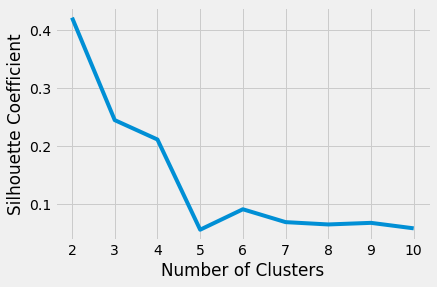

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# set number of clusters
silhouette_coefficients = []

sf_grouped_clustering = sf_grouped.drop('Neighbourhood', 1)

for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, random_state = 0)
   kmeans.fit(sf_grouped_clustering)
   score = silhouette_score(sf_grouped_clustering, kmeans.labels_, metric='euclidean')
   silhouette_coefficients.append(score)
    
import matplotlib.pyplot as plt
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
    


In [28]:
# set number of clusters
kclusters = 3

sf_grouped_clustering = sf_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sf_merged = df_sf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

sf_merged.head() # check the last columns!

,Zip Code,Neighborhood,Population (Census 2000),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,28991,37.780,-122.420,1.0,Coffee Shop,French Restaurant,Vietnamese Restaurant,Sushi Restaurant,Dessert Shop,Thai Restaurant,Cocktail Bar,Theater,Wine Bar,Bakery
1,94103,South of Market,23016,37.780,-122.410,1.0,Coffee Shop,Bakery,Marijuana Dispensary,Vietnamese Restaurant,Gym / Fitness Center,Women's Store,Sandwich Place,Pizza Place,Speakeasy,Beer Bar
2,94107,Potrero Hill,17368,37.770,-122.390,1.0,Coffee Shop,Baseball Stadium,Park,Café,Food Truck,Gym,Sandwich Place,Outdoor Sculpture,New American Restaurant,Pier
3,94108,Chinatown,13716,37.791,-122.409,1.0,Hotel,Coffee Shop,Boutique,Gym,Sushi Restaurant,Speakeasy,Men's Store,Cocktail Bar,French Restaurant,Clothing Store
4,94109,Polk/Russian Hill (Nob Hill),56322,37.790,-122.420,1.0,Gym / Fitness Center,Wine Bar,Grocery Store,Vietnamese Restaurant,Coffee Shop,Sushi Restaurant,American Restaurant,Café,Bar,Art Gallery


In [29]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

sf_merged_nonan = sf_merged.dropna(subset=['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged_nonan['Latitude'], sf_merged_nonan['Longitude'], sf_merged_nonan['Neighborhood'], sf_merged_nonan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [30]:
sf_merged_nonan.loc[sf_merged_nonan['Cluster Labels'] == 0, sf_merged_nonan.columns[[1] + list(range(5, sf_merged_nonan.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Bayview-Hunters Point,0.0,Park,Coffee Shop,Recording Studio,Spa,Brewery,Gym,Construction & Landscaping,Asian Restaurant,Motorcycle Shop,Waterfront


In [31]:
sf_merged_nonan.loc[sf_merged_nonan['Cluster Labels'] == 1, sf_merged_nonan.columns[[1] + list(range(5, sf_merged_nonan.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hayes Valley/Tenderloin/North of Market,1.0,Coffee Shop,French Restaurant,Vietnamese Restaurant,Sushi Restaurant,Dessert Shop,Thai Restaurant,Cocktail Bar,Theater,Wine Bar,Bakery
1,South of Market,1.0,Coffee Shop,Bakery,Marijuana Dispensary,Vietnamese Restaurant,Gym / Fitness Center,Women's Store,Sandwich Place,Pizza Place,Speakeasy,Beer Bar
2,Potrero Hill,1.0,Coffee Shop,Baseball Stadium,Park,Café,Food Truck,Gym,Sandwich Place,Outdoor Sculpture,New American Restaurant,Pier
3,Chinatown,1.0,Hotel,Coffee Shop,Boutique,Gym,Sushi Restaurant,Speakeasy,Men's Store,Cocktail Bar,French Restaurant,Clothing Store
4,Polk/Russian Hill (Nob Hill),1.0,Gym / Fitness Center,Wine Bar,Grocery Store,Vietnamese Restaurant,Coffee Shop,Sushi Restaurant,American Restaurant,Café,Bar,Art Gallery
5,Inner Mission/Bernal Heights,1.0,Mexican Restaurant,Coffee Shop,Cocktail Bar,Pizza Place,Italian Restaurant,Breakfast Spot,Yoga Studio,Dive Bar,Tea Room,Deli / Bodega
6,Ingelside-Excelsior/Crocker-Amazon,1.0,Mexican Restaurant,Latin American Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Chinese Restaurant,Pharmacy,Vietnamese Restaurant,Baseball Field,Bakery
7,Castro/Noe Valley,1.0,Gay Bar,Coffee Shop,Thai Restaurant,Park,Trail,Hill,Scenic Lookout,Wine Bar,New American Restaurant,Yoga Studio
8,Western Addition/Japantown,1.0,Bakery,Cosmetics Shop,Sandwich Place,Salon / Barbershop,Ice Cream Shop,Spa,Gym / Fitness Center,Park,Boutique,American Restaurant
10,Haight-Ashbury,1.0,Park,Coffee Shop,Pizza Place,Ice Cream Shop,Dog Run,Cocktail Bar,Mediterranean Restaurant,Gift Shop,Indian Restaurant,Sushi Restaurant


In [32]:
sf_merged_nonan.loc[sf_merged_nonan['Cluster Labels'] == 2, sf_merged_nonan.columns[[1] + list(range(5, sf_merged_nonan.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Parkside/Forest Hill,2.0,Chinese Restaurant,Park,Sushi Restaurant,Pizza Place,Dumpling Restaurant,Bubble Tea Shop,Sandwich Place,Gas Station,Pub,Coffee Shop
13,Sunset,2.0,Chinese Restaurant,Vietnamese Restaurant,Coffee Shop,Bubble Tea Shop,Bakery,Japanese Restaurant,Thai Restaurant,Deli / Bodega,Bar,Dumpling Restaurant
20,Visitacion Valley/Sunnydale,2.0,Park,Baseball Field,Cantonese Restaurant,Chinese Restaurant,Garden,Bakery,Storage Facility,Trail,Library,Cosmetics Shop
